In [48]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
dataW = pd.read_csv (r'dataW.csv')

In [50]:
dataW

,Country Name,Year,Energy Production Quad BTU,GDP
0,Afghanistan,1980,0.072561,3.641723e+09
1,Algeria,1980,2.803017,4.234638e+10
2,Angola,1980,0.335098,5.930503e+09
3,Argentina,1980,1.597946,7.696192e+10
4,Australia,1980,3.722297,1.499840e+11
...,...,...,...,...
5952,Uzbekistan,2021,1.983724,6.923890e+10
5953,Vanuatu,2021,0.000116,9.563327e+08
5954,Vietnam,2021,2.713688,3.661380e+11
5955,Zambia,2021,0.170076,2.214763e+10


In [51]:
dataW.dtypes

Country Name                   object
Year                            int64
Energy Production Quad BTU    float64
GDP                           float64
dtype: object

In [52]:
from sklearn.isotonic import IsotonicRegression

In [53]:
X = dataW.iloc[:,3].values.reshape(-1,1) #GDP will be X to use predict the Y Energy Production

In [54]:
X

array([[3.64172332e+09],
       [4.23463808e+10],
       [5.93050340e+09],
       ...,
       [3.66138000e+11],
       [2.21476347e+10],
       [2.83712387e+10]])

In [55]:
X.shape

(5957, 1)

In [56]:
Y = dataW.iloc[:,2].values.reshape(-1,1) 

In [57]:
Y

array([[0.07256116],
       [2.80301736],
       [0.33509804],
       ...,
       [2.7136884 ],
       [0.17007611],
       [0.11629721]])

In [58]:
Y.shape

(5957, 1)

Text(0, 0.5, 'Energy Production Quad BTU')

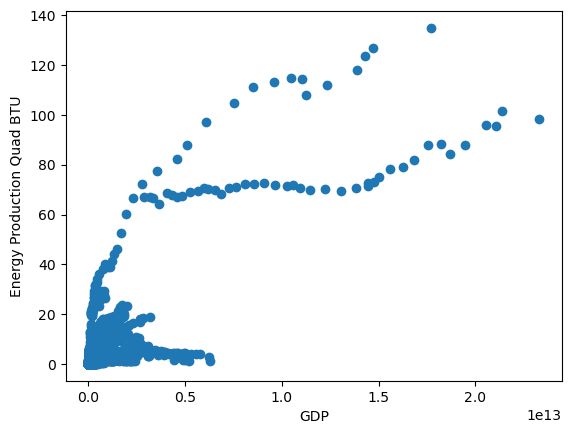

In [59]:
plt.scatter(X,Y)
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')

In [60]:
iso = IsotonicRegression()

In [61]:
modelIso = iso.fit(X,Y.ravel())

In [62]:
modelIso.score(X,Y.ravel())

0.7360926990242063

Text(0, 0.5, 'Energy Production Quad BTU')

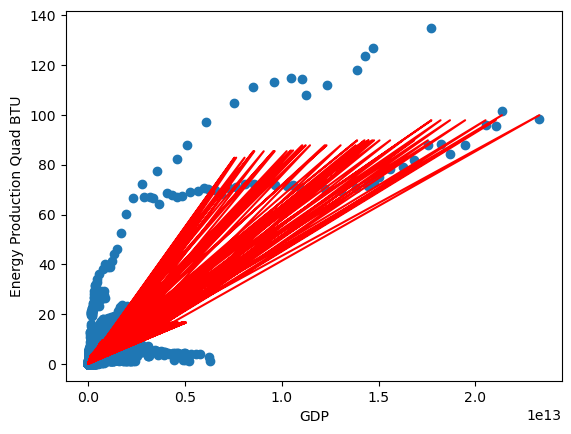

In [63]:
yPredIso = modelIso.predict(X)
plt.scatter(X,Y)
plt.plot(X,yPredIso,color='red')
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')

In [64]:
#Training model

In [65]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state = 42 )

Text(0, 0.5, 'Energy Production Quad BTU')

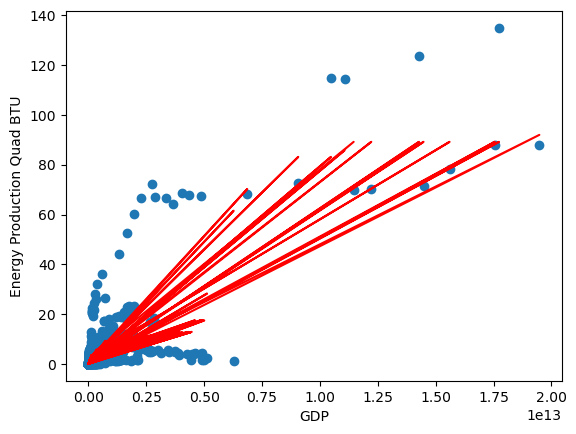

In [81]:

modelIso = iso.fit(X_train,Y_train.ravel())
Y_test_pred = modelIso.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_test_pred,color='red')
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')


In [82]:
modelIso.score(X_test,Y_test)

0.654273453645907